<h1>ACTIVITY 2 - DENGUE DATA ANALYTICS PROJECT</h1>
<hr>

<h2>Analyst: Raeven Maranan</h2>

In [77]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import folium
from folium.plugins import HeatMap

In [78]:
den=pd.read_csv('dengue.csv')

In [79]:
den

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [80]:
den.columns = den.columns.str.strip().str.lower().str.replace(' ', '_')

In [81]:
print("Cleaned column names:\n", den.columns)
den.head()

Cleaned column names:
 Index(['month', 'year', 'region', 'dengue_cases', 'dengue_deaths'], dtype='object')


,month,year,region,dengue_cases,dengue_deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


<h1>Cleaning Data Frames</h1>
<hr>

In [82]:
den.isnull().sum()

month            0
year             0
region           0
dengue_cases     0
dengue_deaths    0
dtype: int64

<h1>Data Types</h1>
<hr>

In [83]:
den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   month          1020 non-null   object
 1   year           1020 non-null   int64 
 2   region         1020 non-null   object
 3   dengue_cases   1020 non-null   int64 
 4   dengue_deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [84]:
den.describe()

,year,dengue_cases,dengue_deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [85]:
den['month']=den['month'].astype('category')
den['year']=den['year'].astype('category')
den['region']=den['region'].astype('category')
den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   month          1020 non-null   category
 1   year           1020 non-null   category
 2   region         1020 non-null   category
 3   dengue_cases   1020 non-null   int64   
 4   dengue_deaths  1020 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 20.3 KB


<h1> Exploratory Data analysis</h1>
<hr>

<h1>1)what is the total number of reported dengue cases per year?</h1>

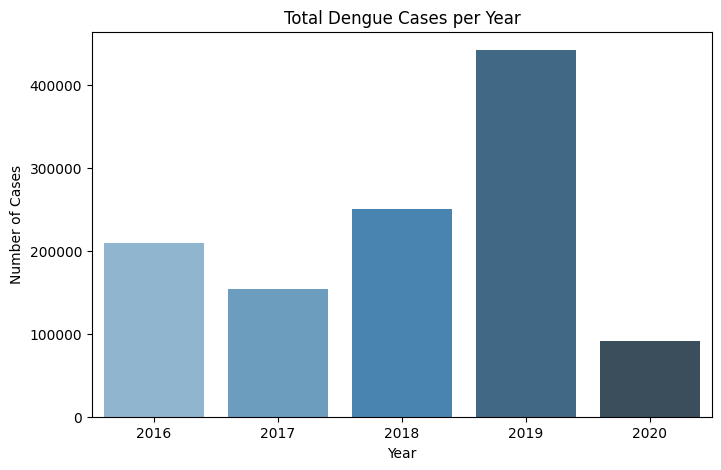

In [86]:
cases_per_year = den.groupby('year')['dengue_cases'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=cases_per_year, x='year', y='dengue_cases', palette='Blues_d')
plt.title('Total Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()

<h1>insights no.1-2</h1>
<p>Per year from 2016-2020 dengue cases play around 1000-4000+ </p>
<p>The peak year may indicate better surveillance or major outbreaks</p>

<h1>2)what region or city has the highest number of dengue cases?</h1>

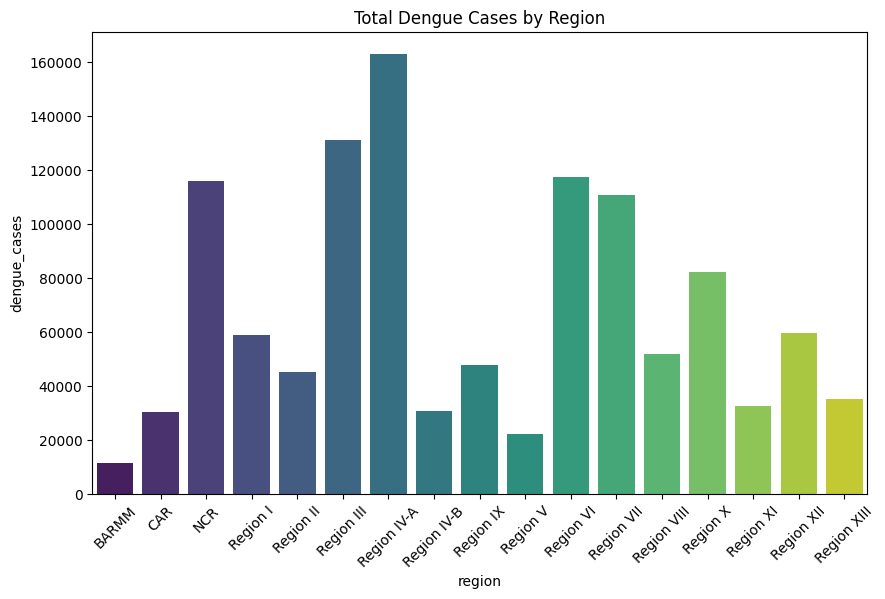

In [87]:
cases_per_region = den.groupby('region')['dengue_cases'].sum().reset_index().sort_values(by='dengue_cases', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=cases_per_region, x='region', y='dengue_cases', palette='viridis')
plt.title('Total Dengue Cases by Region')
plt.xticks(rotation=45)
plt.show()

<h1>insights no.3-4</h1>
<p> Region 4a had the highest number </p>
<p>Focused mosquito control should prioritize the top affected regions</p>

<h1>3)Explain the average dengue cases per month across all years?</h1>


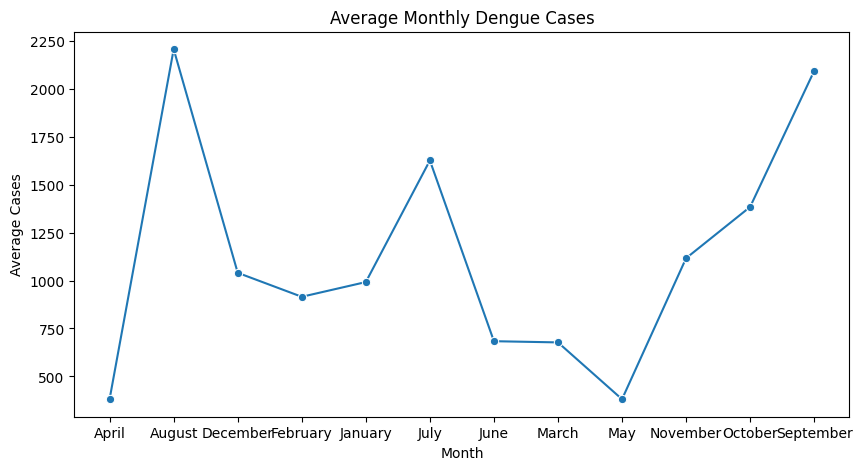

In [94]:
avg_cases_per_month = den.groupby('month')['dengue_cases'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_cases_per_month, x='month', y='dengue_cases', marker='o')
plt.title('Average Monthly Dengue Cases')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.show()

<h1>insights no. 5-6</h1>
<p> Certain months show sharp increases, likely aligned with rainy seasons</p>
<p>Preventive campaigns should start before the months with the steepest rise </p>

<h1>4)Top 10 regions with highest average dengue cases per year?</h1>


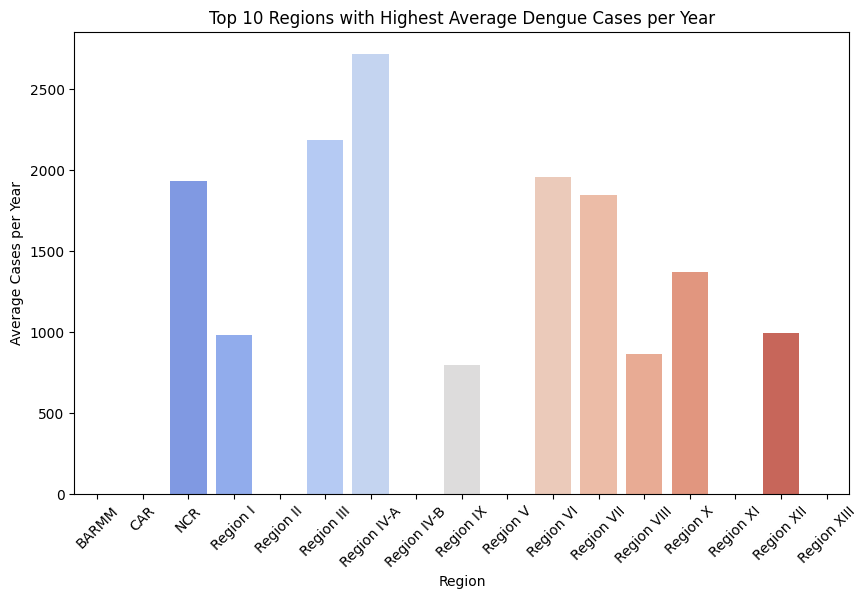

In [89]:
top_regions = den.groupby('region')['dengue_cases'].mean().reset_index().sort_values(by='dengue_cases', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_regions, x='region', y='dengue_cases', palette='coolwarm')
plt.title('Top 10 Regions with Highest Average Dengue Cases per Year')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Average Cases per Year')
plt.show()

<h1>insights no. 7-8</h1>
<p> The top 10 regions consistently record high yearly averages, indicating recurring outbreaks</p>
<p>These regions should be prioritized for continuous monitoring and vector control programs</p>

<h1>5)explain the peak season or month of dengue incidence</h1>
<hr>

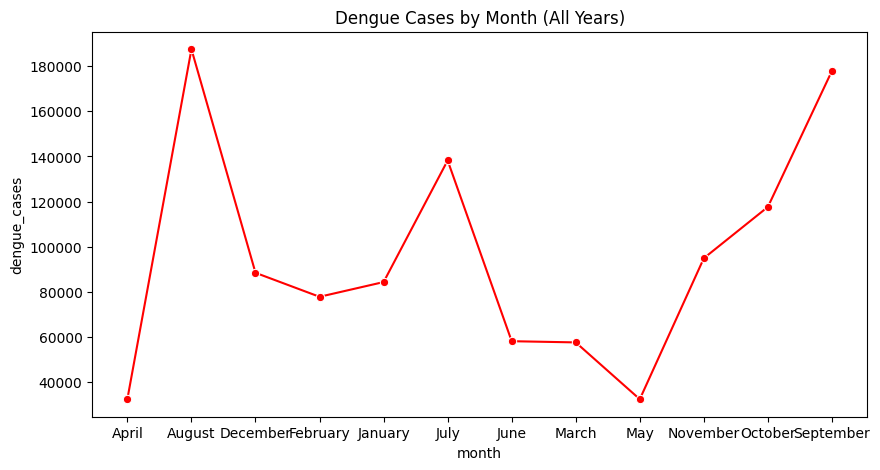

In [95]:
monthly_total = den.groupby('month')['dengue_cases'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_total, x='month', y='dengue_cases', marker='o', color='red')
plt.title('Dengue Cases by Month (All Years)')
plt.show()

<h1>insights no. 9-10</h1>
<p>A distinct rise in specific months confirms dengue’s seasonality pattern</p>
<p>Early government action during pre-peak months could greatly reduce infections</p>

<h1>6)what is the overall mortality rate?</h1>


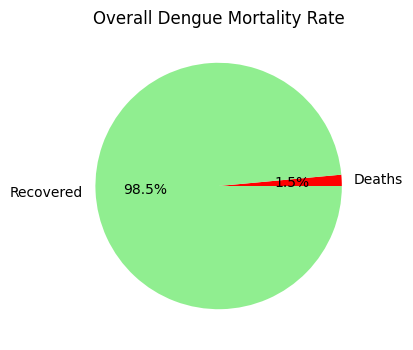

In [91]:
total_cases = den['dengue_cases'].sum()
total_deaths = den['dengue_deaths'].sum()
mortality_rate = (total_deaths / total_cases) * 100

plt.figure(figsize=(4,4))
plt.pie([total_deaths, total_cases-total_deaths],
            labels=['Deaths', 'Recovered'], autopct='%1.1f%%', colors=['red', 'lightgreen'])
plt.title('Overall Dengue Mortality Rate')
plt.show()

<h1>insights no.11-12</h1>
<p> The overall mortality rate is relatively low, showing effective treatment</p>
<p>Even a small percentage can mean many lives lost if total infections are high</p>

<h1>7)what is the mortality rate by region?</h1>

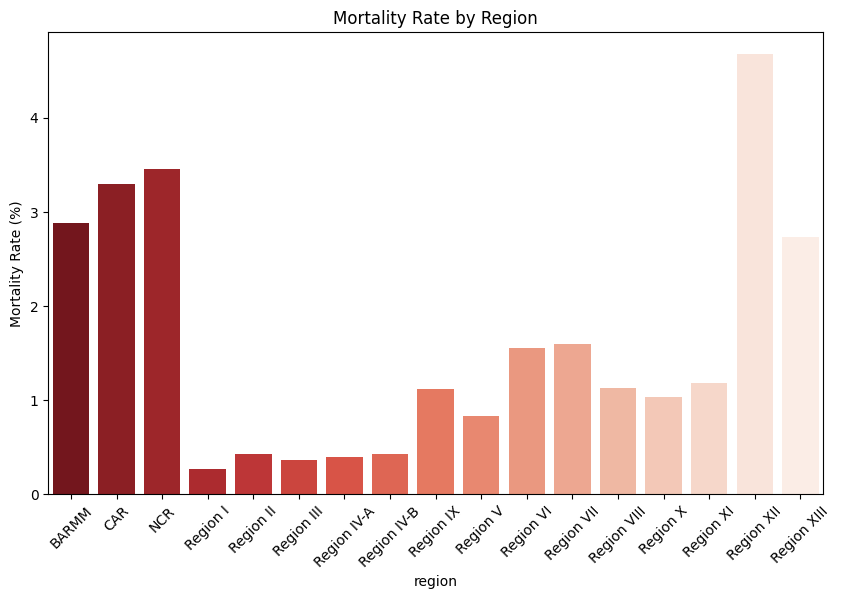

In [92]:
mortality_by_region = den.groupby('region').apply(
    lambda x: (x['dengue_deaths'].sum() / x['dengue_cases'].sum()) * 100
    ).reset_index(name='mortality_rate')

plt.figure(figsize=(10,6))
sns.barplot(data=mortality_by_region, x='region', y='mortality_rate', palette='Reds_r')
plt.title('Mortality Rate by Region')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate (%)')
plt.show()

<h1>insights no.13-14</h1>
<p> Regions with high mortality may have delayed treatment or weak health systems</p>
<p>Comparing mortality and case counts helps identify areas needing urgent attention</p>

<h1>8)define the correlation between cases and mortality rate</h1>
<hr>

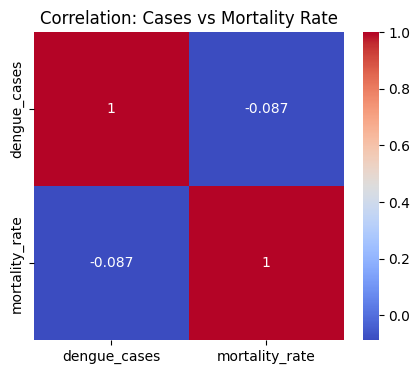

In [93]:
den['mortality_rate'] = (den['dengue_deaths'] / den['dengue_cases']) * 100
corr = den[['dengue_cases', 'mortality_rate']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation: Cases vs Mortality Rate')
plt.show()

<h1>insights no.15-16</h1>
<p>Weak correlation implies improved healthcare during outbreaks</p>
<p>Strong correlation would suggest systems are overwhelmed during epidemics</p>